#Assignment Two 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

####Function definations that are used in the notebook

In [0]:
def multi(n, mu, sig, x):
  '''
  Input: n-dimention, mu-mean, sig-covariance matrix, x-data vector
  returns the probability p(x/c1) distribution of the sample
  '''
  return ((2*np.pi)**(-n/2))*(np.linalg.det(sig)**(-0.5))*(np.exp(-0.5*(x.reshape(2,1) - mu.reshape(2,1)).T@np.linalg.inv(sig)@(x.reshape(2,1) - mu.reshape(2,1))))

In [0]:
def compute(sig):
  '''
  Input: sig-covariance matrix
  returns the value of A (for using in linear transformation, AX + b) by spectral decomposition which is A = eig_vec*(eig_val)**(0.5)
  '''
  val, vec = np.linalg.eig(sig)
  val = np.diag(val)
  return vec@val**(0.5)

def linear_transform(N, n, mu1, mu2, sig1, sig2, pw1, pw2):
  '''
  Input: N-samples, n-dimension, mu-mean vector, sig-covariance matrix
  returns random samples generated according to mu and sig by linear transformation technique from zero mean and identity covariance
  '''
  
  tempo = np.random.rand(1,N)
  b = len(np.where(tempo >= pw1)[0])
  a = N - b
  
  temp1 = np.random.multivariate_normal([0,0], np.identity(2), a).T
  temp2 = np.random.multivariate_normal([0,0], np.identity(2), b).T
  
  c1 = compute(sig1)@temp1 + mu1.reshape(2,1) #Linear transformation
  c2 = compute(sig2)@temp2 + mu2.reshape(2,1)
  
  return (c1,c2, a, b)

##Answer 2
###Generating scatter plots of samples distributed according to given mean and covariance

###Case 1
mu1 = [0, 0]'; mu2 = [3, 3]' and 
sigma1 = [1, 0; 0, 1]; sigma2 =  [1, 0; 0, 1]

In [0]:
N = 400
n = 2
c1mu1 = np.array([0, 0])
c1mu2 = np.array([3, 3])
c1sig1 = np.identity(2)
c1sig2 = np.identity(2)
c1pw1 = 0.5 #Prior probabilities
c1pw2 = 0.5

c1class1,c1class2,c1_num1,c1_num2 = linear_transform(N, n, c1mu1, c1mu2, c1sig1, c1sig2, c1pw1, c1pw2) # generating the random samples

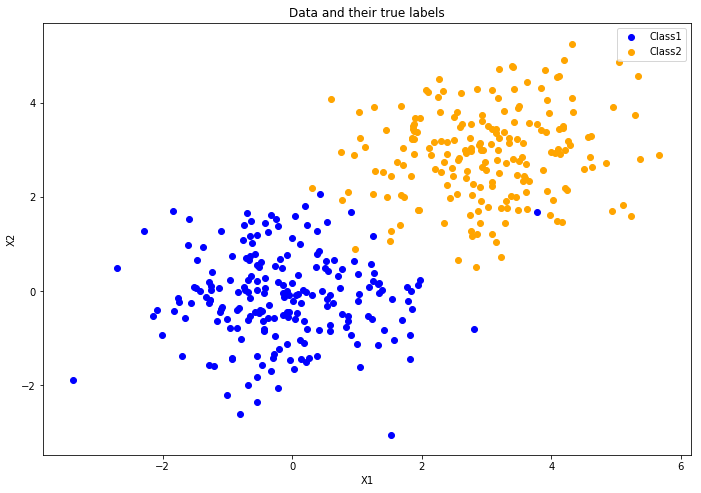

In [207]:
plt.axes([1,1,1.5,1.5])
plt.scatter(c1class1[0,:399], c1class1[1,:399], marker = 'o', c = 'blue')
plt.scatter(c1class2[0,:399], c1class2[1,:399], marker = 'o', c = 'orange')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data and their true labels')
plt.legend(('Class1', 'Class2'))

We pass all the data points belonging to class 1 and class 2 through the multivariate gaussian to get the probability distributions and then MAP classifier to classify the points

In [0]:
c1g11 = np.zeros(c1_num1)
c1g12 = np.zeros(c1_num2)
c1g21 = np.zeros(c1_num1)
c1g22 = np.zeros(c1_num2)
for i in range(c1_num1): # Passing each sample through the multivariate gaussian equation to get the probability value
  c1g11[i] = multi(2, c1mu1, c1sig1, c1class1[:,i]) # 400 points of class 1 to function class 1
  c1g21[i] = multi(2, c1mu2, c1sig2, c1class1[:,i]) # 400 points of class 1 to function class 2
for i in range(c1_num2):
  c1g12[i] = multi(2, c1mu1, c1sig1, c1class2[:,i]) # 400 points of class 2 to function class 1
  c1g22[i] = multi(2, c1mu2, c1sig2, c1class2[:,i]) # 400 points of class 2 to function class 2
  
c1decide1 = np.log(c1g11) - np.log(c1g21) + np.log(c1pw1) - np.log(c1pw2) # Using the MAP classifier
c1decide2 = np.log(c1g22) - np.log(c1g12) + np.log(c1pw2) - np.log(c1pw1)

In [209]:
# if c1decide1 > 0, the points belong to class 1 but since we want the missclassified points look for c1decide1 < 0
c1t1 = np.argwhere(c1decide1 < 0)
print("The number of samples that belong to class 1 but got classifed as class 2: {} samples".format(c1t1.shape[0]))

The number of samples that belong to class 1 but got classifed as class 2: 1 samples


In [210]:
# if c1decide2 > 0, the points belong to class 2 but since we want the missclassified points look for c1decide2 < 0
c1t2 = np.argwhere(c1decide2 < 0)
print("The number of samples that belong to class 2 but got classifed as class 1: {} samples".format(c1t2.shape[0]))

The number of samples that belong to class 2 but got classifed as class 1: 6 samples


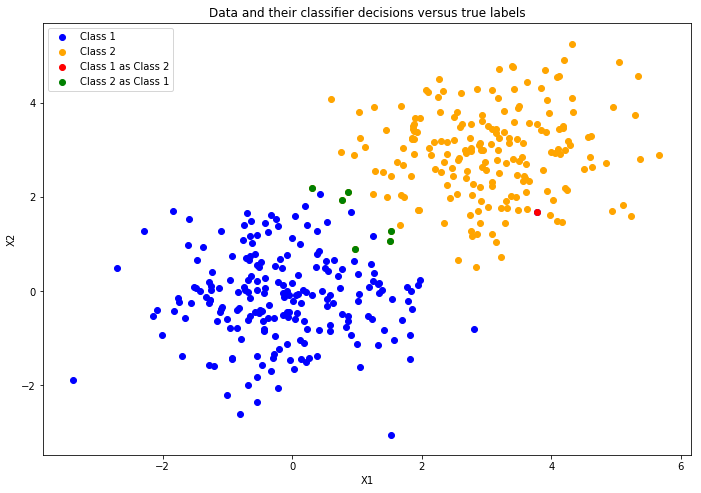

In [211]:
plt.axes([1, 1, 1.5, 1.5])
plt.scatter(c1class1[0,:c1_num1], c1class1[1,:c1_num1], marker = 'o', color = 'blue')
plt.scatter(c1class2[0,:c1_num2], c1class2[1,:c1_num2],  marker = 'o', color = 'orange')
plt.scatter(c1class1[0,c1t1], c1class1[1,c1t1],  marker = 'o', color = 'red')
plt.scatter(c1class2[0,c1t2], c1class2[1,c1t2],  marker = 'o', color = 'green')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data and their classifier decisions versus true labels')
plt.legend(('Class 1', 'Class 2', 'Class 1 as Class 2', 'Class 2 as Class 1'))

Probability of error can be calculated by counting the number of missclassified points and dividin gby the total number of points

In [212]:
p_error = (c1t1.shape[0] + c1t2.shape[0])/(400)
print('The probability of error = {}'.format(p_error))

The probability of error = 0.0175


###Case 2
mean1 = [0, 0]' ; mean2 = [3, 3]' and sigma1 = sigma2 = [3, 1; 1, 0.8]

In [0]:
N = 400
n = 2
c2mu1 = np.array([0, 0])
c2mu2 = np.array([3, 3])
c2sig1 = np.array([[3,1],[1,0.8]])
c2sig2 = np.array([[3,1],[1,0.8]])
c2pw1 = 0.5
c2pw2 = 0.5

c2class1, c2class2, c2_num1, c2_num2 = linear_transform(N, n, c2mu1, c2mu2, c2sig1, c2sig2, c2pw1, c2pw2)

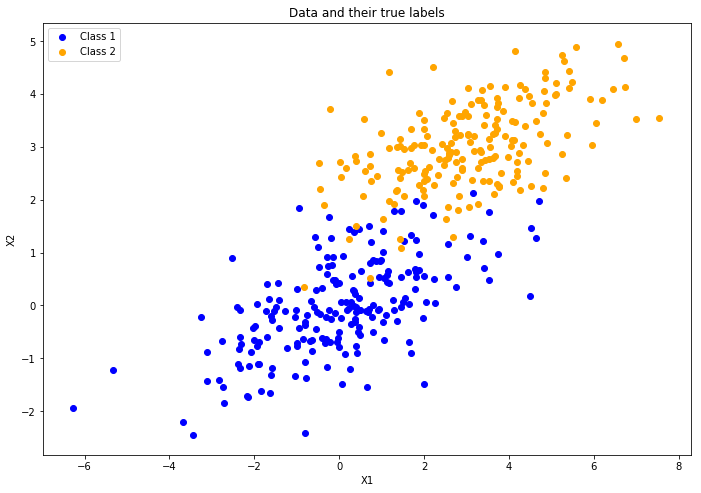

In [214]:
plt.axes([1,1,1.5,1.5])
plt.scatter(c2class1[0,:c2_num1], c2class1[1,:c2_num1], marker = 'o', c = 'blue')
plt.scatter(c2class2[0,:c2_num2], c2class2[1,:c2_num2], marker = 'o', c = 'orange')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data and their true labels')
plt.legend(('Class 1', 'Class 2'))

In [0]:
c2g11 = np.zeros(c2_num1)
c2g12 = np.zeros(c2_num2)
c2g21 = np.zeros(c2_num1)
c2g22 = np.zeros(c2_num2)
for i in range(c2_num1):
  c2g11[i] = multi(2, c2mu1, c2sig1, c2class1[:,i])
  c2g21[i] = multi(2, c2mu2, c2sig2, c2class1[:,i])
for i in range(c2_num2):
  c2g12[i] = multi(2, c2mu1, c2sig1, c2class2[:,i])
  c2g22[i] = multi(2, c2mu2, c2sig2, c2class2[:,i])
  
c2decide1 = np.log(c2g11) - np.log(c2g21) + np.log(c2pw1) - np.log(c2pw2)
c2decide2 = np.log(c2g22) - np.log(c2g12) + np.log(c2pw2) - np.log(c2pw1)

In [216]:
# if c2decide1 > 0, the points belong to class 1 but since we want the missclassified points look for c2decide1 < 0
c2t1 = np.argwhere(c2decide1 < 0)
print("The number of samples that belong to class 1 but got classifed as class 2: {} samples".format(c2t1.shape[0]))

The number of samples that belong to class 1 but got classifed as class 2: 14 samples


In [217]:
# if c2decide2 > 0, the points belong to class 1 but since we want the missclassified points look for c2decide2 < 0
c2t2 = np.argwhere(c2decide2 < 0)
c2t2.shape
print("The number of samples that belong to class 2 but got classifed as class 1: {} samples".format(c2t2.shape[0]))

The number of samples that belong to class 2 but got classifed as class 1: 6 samples


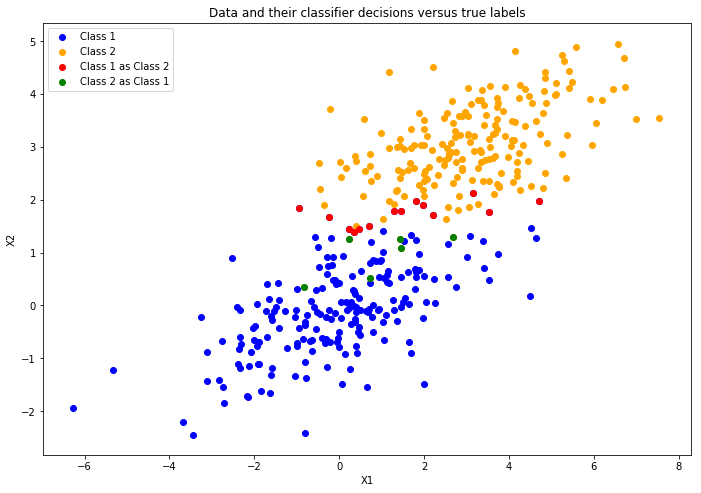

In [218]:
plt.axes([1, 1, 1.5, 1.5])
plt.scatter(c2class1[0,:c2_num1], c2class1[1,:c2_num1], marker = 'o', color = 'blue')
plt.scatter(c2class2[0,:c2_num2], c2class2[1,:c2_num2],  marker = 'o', color = 'orange')
plt.scatter(c2class1[0,c2t1], c2class1[1,c2t1],  marker = 'o', color = 'red')
plt.scatter(c2class2[0,c2t2], c2class2[1,c2t2],  marker = 'o', color = 'green')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data and their classifier decisions versus true labels')
plt.legend(('Class 1', 'Class 2', 'Class 1 as Class 2', 'Class 2 as Class 1'))

Probability of error can be calculated by counting the number of missclassified points and dividing by the total number of points

In [219]:
p_error = (c2t1.shape[0] + c2t2.shape[0])/(400)
print('The probability of error = {}'.format(p_error))

The probability of error = 0.05


###Case 3

In [0]:
N = 400
n = 2
c3mu1 = np.array([0, 0])
c3mu2 = np.array([2, 2])
c3sig1 = np.array([[2,0.5],[0.5,1]])
c3sig2 = np.array([[2,-1.9],[-1.9,5]])
c3pw1 = 0.5
c3pw2 = 0.5

c3class1, c3class2, c3_num1, c3_num2 = linear_transform(N, n, c3mu1, c3mu2, c3sig1, c3sig2, c3pw1, c3pw2)

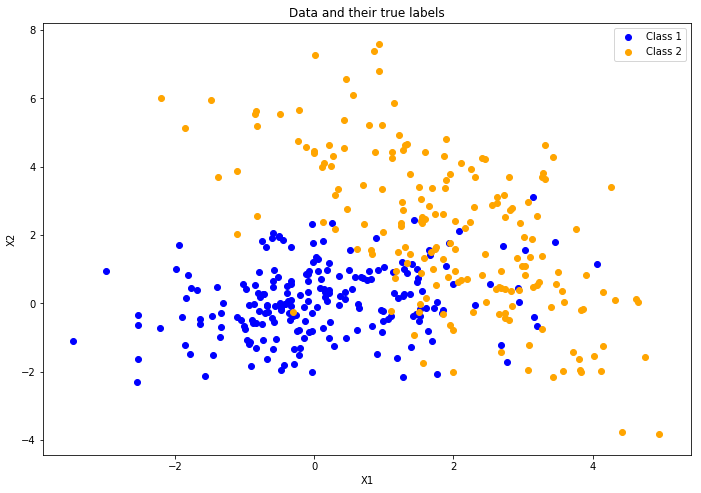

In [221]:
plt.axes([1,1,1.5,1.5])
plt.scatter(c3class1[0,:c3_num1], c3class1[1,:c3_num1], marker = 'o', c = 'blue')
plt.scatter(c3class2[0,:c3_num2], c3class2[1,:c3_num2], marker = 'o', c = 'orange')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data and their true labels')
plt.legend(('Class 1', 'Class 2'))

In [0]:
c3g11 = np.zeros(c3_num1)
c3g12 = np.zeros(c3_num2)
c3g21 = np.zeros(c3_num1)
c3g22 = np.zeros(c3_num2)
for i in range(c3_num1):
  c3g11[i] = multi(2, c3mu1, c3sig1, c3class1[:,i])
  c3g21[i] = multi(2, c3mu2, c3sig2, c3class1[:,i])
for i in range(c3_num2):
  c3g12[i] = multi(2, c3mu1, c3sig1, c3class2[:,i])
  c3g22[i] = multi(2, c3mu2, c3sig2, c3class2[:,i])
  
c3decide1 = np.log(c3g11) - np.log(c3g21) + np.log(c3pw1) - np.log(c3pw2)
c3decide2 = np.log(c3g22) - np.log(c3g12) + np.log(c3pw2) - np.log(c3pw1)

In [223]:
# if c3decide1 > 0, the points belong to class 1 but since we want the missclassified points look for c3decide1 < 0
c3t1 = np.argwhere(c3decide1 < 0)
print("The number of samples that belong to class 1 but got classifed as class 2: {} samples".format(c3t1.shape[0]))

The number of samples that belong to class 1 but got classifed as class 2: 24 samples


In [224]:
# if c3decide2 > 0, the points belong to class 1 but since we want the missclassified points look for c3decide2 < 0
c3t2 = np.argwhere(c3decide2 < 0)
print("The number of samples that belong to class 2 but got classifed as class 1: {} samples".format(c3t2.shape[0]))

The number of samples that belong to class 2 but got classifed as class 1: 19 samples


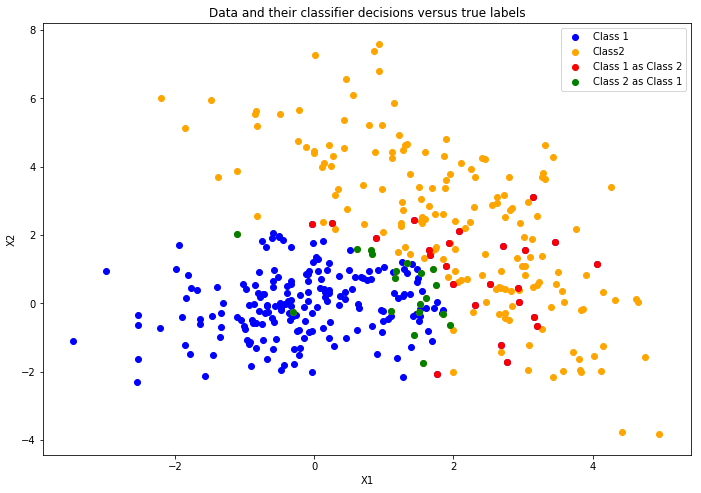

In [225]:
plt.axes([1, 1, 1.5, 1.5])
plt.scatter(c3class1[0,:c3_num1], c3class1[1,:c3_num1], marker = 'o', color = 'blue')
plt.scatter(c3class2[0,:c3_num2], c3class2[1,:c3_num2],  marker = 'o', color = 'orange')
plt.scatter(c3class1[0,c3t1], c3class1[1,c3t1],  marker = 'o', color = 'red')
plt.scatter(c3class2[0,c3t2], c3class2[1,c3t2],  marker = 'o', color = 'green')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data and their classifier decisions versus true labels')
plt.legend(('Class 1', 'Class2', 'Class 1 as Class 2', 'Class 2 as Class 1'))

Probability of error can be calculated by counting the number of missclassified points and dividin gby the total number of points

In [226]:
p_error = (c3t1.shape[0] + c3t2.shape[0])/(400)
print('The probability of error = {}'.format(p_error))

The probability of error = 0.1075


###Case 4

In [227]:
c4pw1 = 0.05
c4pw2 = 0.95

c4class1, c4class2, c4_num1, c4_num2 = linear_transform(N, n, c1mu1, c1mu2, c1sig1, c1sig2, c4pw1, c4pw2)
print(c4_num1, c4_num2)

23 377


In [0]:
c4g11 = np.zeros(c4_num1)
c4g12 = np.zeros(c4_num2)
c4g21 = np.zeros(c4_num1)
c4g22 = np.zeros(c4_num2)
for i in range(c4_num1):
  c4g11[i] = multi(2, c1mu1, c1sig1, c4class1[:,i])
  c4g21[i] = multi(2, c1mu2, c1sig2, c4class1[:,i])
for i in range(c4_num2):
  c4g12[i] = multi(2, c1mu1, c1sig1, c4class2[:,i])
  c4g22[i] = multi(2, c1mu2, c1sig2, c4class2[:,i])

c4decide1 = np.log(c4g11) - np.log(c4g21) + np.log(c4pw1) - np.log(c4pw2)
c4decide2 = np.log(c4g22) - np.log(c4g12) + np.log(c4pw2) - np.log(c4pw1)

In [229]:
# if c4decide1 > 0, the points belong to class 1 but since we want the missclassified points look for c4decide1 < 0
c4t1 = np.argwhere(c4decide1 < 0)
print("The number of samples that belong to class 1 but got classifed as class 2: {} samples".format(c4t1.shape[0]))

The number of samples that belong to class 1 but got classifed as class 2: 2 samples


In [230]:
# if c4decide2 > 0, the points belong to class 1 but since we want the missclassified points look for c4decide2 < 0
c4t2 = np.argwhere(c4decide2 < 0)
print("The number of samples that belong to class 2 but got classifed as class 1: {} samples".format(c4t2.shape[0]))

The number of samples that belong to class 2 but got classifed as class 1: 1 samples


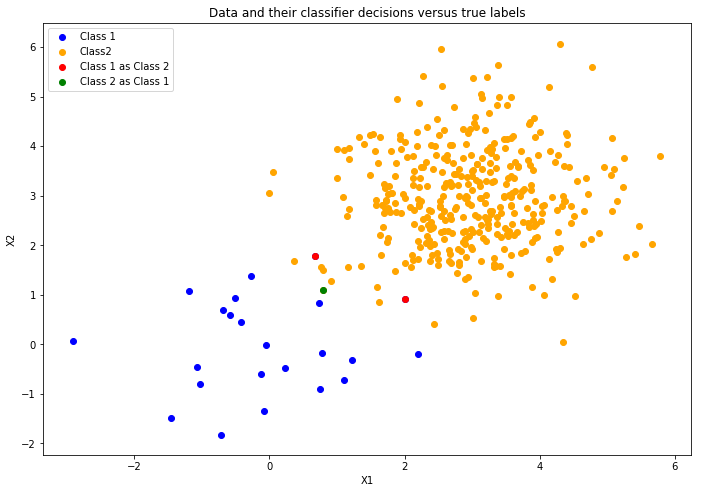

In [231]:
plt.axes([1, 1, 1.5, 1.5])
plt.scatter(c4class1[0,:c4_num1], c4class1[1,:c4_num1], marker = 'o', color = 'blue')
plt.scatter(c4class2[0,:c4_num2], c4class2[1,:c4_num2], marker = 'o', color = 'orange')
plt.scatter(c4class1[0,c4t1], c4class1[1,c4t1], marker = 'o', color = 'red')
plt.scatter(c4class2[0,c4t2], c4class2[1,c4t2], marker = 'o', color = 'green')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data and their classifier decisions versus true labels')
plt.legend(('Class 1', 'Class2', 'Class 1 as Class 2', 'Class 2 as Class 1'))

Probability of error can be calculated by counting the number of missclassified points and dividin gby the total number of points

In [232]:
p_error = (c4t1.shape[0] + c4t2.shape[0])/(400)
print('The probability of error = {}'.format(p_error))

The probability of error = 0.0075


###Case 5

In [0]:
c5pw1 = 0.05
c5pw2 = 0.95

c5class1, c5class2, c5_num1, c5_num2 = linear_transform(N, n, c2mu1, c2mu2, c2sig1, c2sig2, c5pw1, c5pw2)

In [0]:
c5g11 = np.zeros(c5_num1)
c5g12 = np.zeros(c5_num2)
c5g21 = np.zeros(c5_num1)
c5g22 = np.zeros(c5_num2)
for i in range(c5_num1):
  c5g11[i] = multi(2, c2mu1, c2sig1, c5class1[:,i])
  c5g21[i] = multi(2, c2mu2, c2sig2, c5class1[:,i])
for i in range(c5_num2):
  c5g12[i] = multi(2, c2mu1, c2sig1, c5class2[:,i])
  c5g22[i] = multi(2, c2mu2, c2sig2, c5class2[:,i])

c5decide1 = np.log(c5g11) - np.log(c5g21) + np.log(c5pw1) - np.log(c5pw2)
c5decide2 = np.log(c5g22) - np.log(c5g12) + np.log(c5pw2) - np.log(c5pw1)

In [235]:
# if c5decide1 > 0, the points belong to class 1 but since we want the missclassified points look for c5decide1 < 0
c5t1 = np.argwhere(c5decide1 < 0)
print("The number of samples that belong to class 1 but got classifed as class 2: {} samples".format(c5t1.shape[0]))

The number of samples that belong to class 1 but got classifed as class 2: 7 samples


In [236]:
# if c5decide2 > 0, the points belong to class 1 but since we want the missclassified points look for c5decide2 < 0
c5t2 = np.argwhere(c5decide2 < 0)
print("The number of samples that belong to class 2 but got classifed as class 1: {} samples".format(c5t2.shape[0]))

The number of samples that belong to class 2 but got classifed as class 1: 1 samples


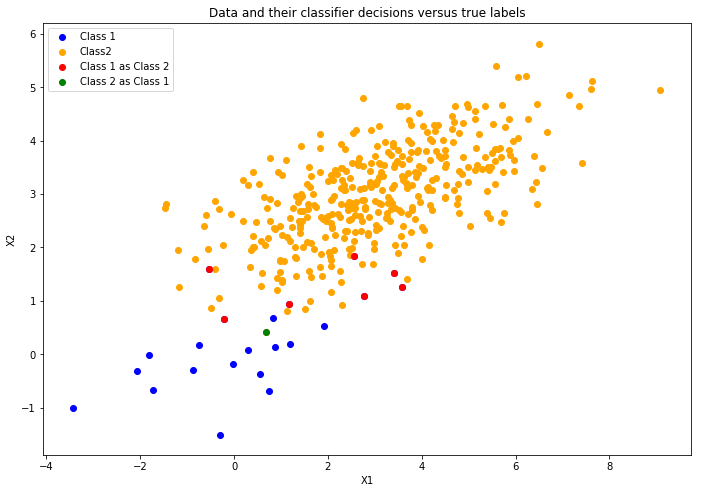

In [237]:
plt.axes([1, 1, 1.5, 1.5])
plt.scatter(c5class1[0,:c5_num1], c5class1[1,:c5_num1], marker = 'o', color = 'blue')
plt.scatter(c5class2[0,:c5_num2], c5class2[1,:c5_num2], marker = 'o', color = 'orange')
plt.scatter(c5class1[0,c5t1], c5class1[1,c5t1], marker = 'o', color = 'red')
plt.scatter(c5class2[0,c5t2], c5class2[1,c5t2], marker = 'o', color = 'green')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data and their classifier decisions versus true labels')
plt.legend(('Class 1', 'Class2', 'Class 1 as Class 2', 'Class 2 as Class 1'))

Probability of error can be calculated by counting the number of missclassified points and dividin gby the total number of points

In [238]:
p_error = (c5t1.shape[0] + c5t2.shape[0])/(400)
print('The probability of error = {}'.format(p_error))

The probability of error = 0.02


###Case 6

In [0]:
c6pw1 = 0.05
c6pw2 = 0.95

c6class1, c6class2, c6_num1, c6_num2 = linear_transform(N, n, c3mu1, c3mu2, c3sig1, c3sig2, c6pw1, c6pw2)

In [0]:
c6g11 = np.zeros(c6_num1)
c6g12 = np.zeros(c6_num2)
c6g21 = np.zeros(c6_num1)
c6g22 = np.zeros(c6_num2)
for i in range(c6_num1):
  c6g11[i] = multi(2, c3mu1, c3sig1, c6class1[:,i])
  c6g21[i] = multi(2, c3mu2, c3sig2, c6class1[:,i])
for i in range(c6_num2):
  c6g12[i] = multi(2, c3mu1, c3sig1, c6class2[:,i])
  c6g22[i] = multi(2, c3mu2, c3sig2, c6class2[:,i])

c6decide1 = np.log(c6g11) - np.log(c6g21) + np.log(c6pw1) - np.log(c6pw2)
c6decide2 = np.log(c6g22) - np.log(c6g12) + np.log(c6pw2) - np.log(c6pw1)

In [241]:
# if c6decide1 > 0, the points belong to class 1 but since we want the missclassified points look for c6decide1 < 0
c6t1 = np.argwhere(c6decide1 < 0)
print("The number of samples that belong to class 1 but got classifed as class 2: {} samples".format(c6t1.shape[0]))

The number of samples that belong to class 1 but got classifed as class 2: 5 samples


In [242]:
# if c6decide2 > 0, the points belong to class 1 but since we want the missclassified points look for c6decide2 < 0
c6t2 = np.argwhere(c6decide2 < 0)
print("The number of samples that belong to class 2 but got classifed as class 1: {} samples".format(c6t2.shape[0]))

The number of samples that belong to class 2 but got classifed as class 1: 2 samples


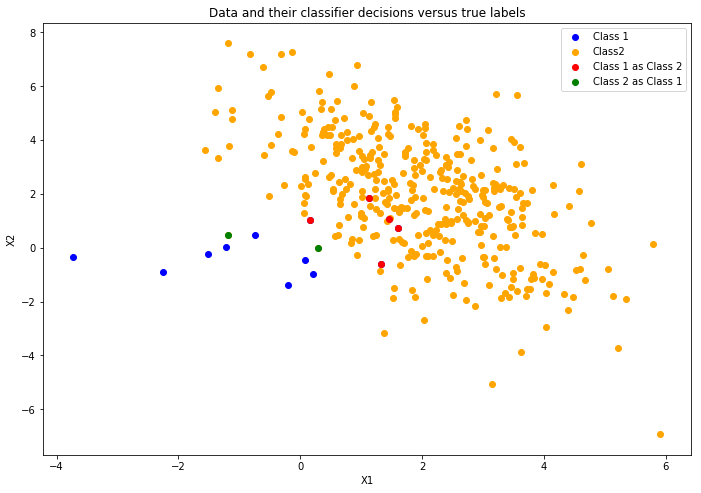

In [243]:
plt.axes([1, 1, 1.5, 1.5])
plt.scatter(c6class1[0,:c6_num1], c6class1[1,:c6_num1], marker = 'o', color = 'blue')
plt.scatter(c6class2[0,:c6_num2], c6class2[1,:c6_num2], marker = 'o', color = 'orange')
plt.scatter(c6class1[0,c6t1], c6class1[1,c6t1], marker = 'o', color = 'red')
plt.scatter(c6class2[0,c6t2], c6class2[1,c6t2], marker = 'o', color = 'green')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data and their classifier decisions versus true labels')
plt.legend(('Class 1', 'Class2', 'Class 1 as Class 2', 'Class 2 as Class 1'))

Probability of error can be calculated by counting the number of missclassified points and dividin gby the total number of points

In [244]:
p_error = (c6t1.shape[0] + c6t2.shape[0])/(400)
print('The probability of error = {}'.format(p_error))

The probability of error = 0.0175


##Answer 3

###Case 1

In [0]:
def gen_proj(mu1, mu2, sig1, sig2):
  '''
  Input: mu-mean, sig-covariance matrix
  returns the eigen vector which needs to be used to project the data using the Linear Discriminant Analysis
  '''
  sb = (mu1.reshape(2,1) - mu2.reshape(2,1))@(mu1.reshape(2,1) - mu2.reshape(2,1)).T # In between scatter matrix
  sw = sig1 + sig2 # Within scatter matrix
#   print(sb, sw)
  mat = np.linalg.inv(sw)@sb 
  vals, vecs = np.linalg.eig(mat) 
  return vecs[:,np.argmax(vals)] # returning the eigen vector corresponding to the max eigen value

In [0]:
# c1vector = gen_proj(c1mu1, c1mu2, c1sig1, c1sig2)
# Passing the estimated mean and covariance from given data samples
c1vector = gen_proj(c1class1.mean(axis = 1), c1class2.mean(axis = 1), np.cov(c1class1), np.cov(c1class2)) 


Number of samples of class 1 classified as class 2: 1
Number of samples of class 2 classified as class 1: 2
Error = 0.0075


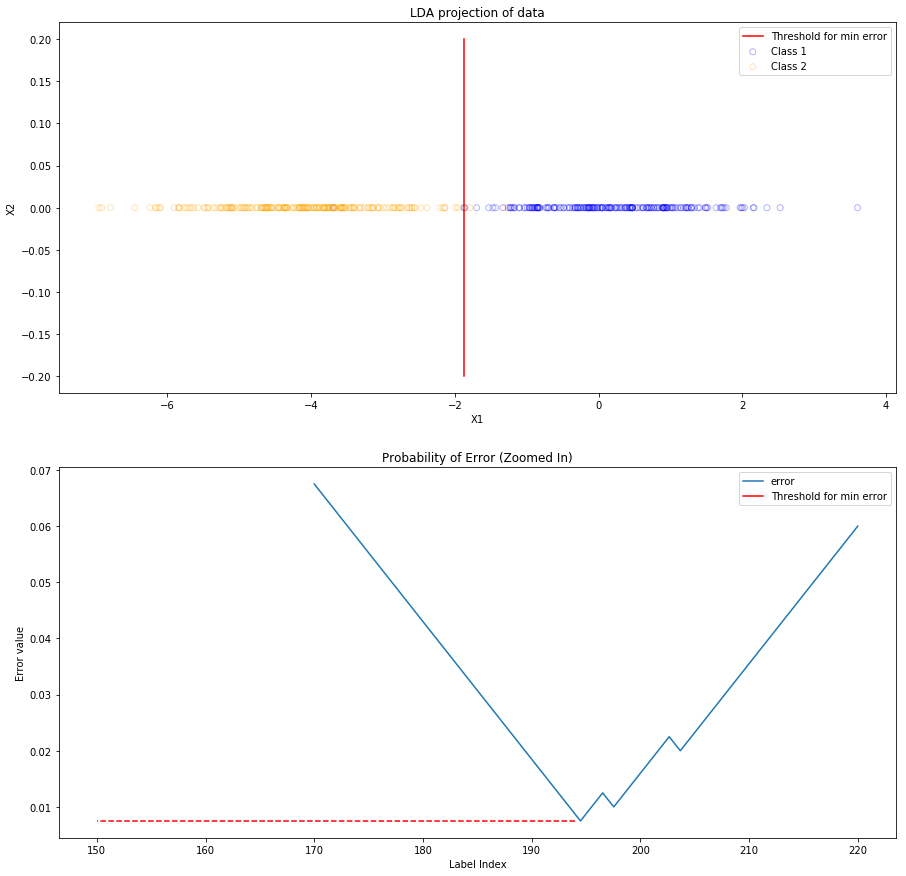

In [264]:
c1lda1 = c1vector.reshape(1,2)@c1class1 # Multiplying with the eigen vector for projecting the data
c1lda2 = c1vector.reshape(1,2)@c1class2
  
  
df1 = pd.DataFrame(c1lda1.T)
df1.columns = ['Values']
df1['Class'] = pd.Series([1]*c1_num1)
df2 = pd.DataFrame(c1lda2.T)
df2.columns = ['Values']
df2['Class'] = pd.Series([2]*c1_num2)
df3 = pd.concat([df1,df2])
df3.sort_values(by = ['Values'], axis = 0, inplace = True)
df3.reset_index(inplace = True)

error = []
erc1 = c1_num2
erc2 = 0
for val in df3.index:
  if(df3.iloc[val]['Class'] == 2):
    erc1 = erc1 - 1
  elif(df3.iloc[val]['Class'] == 1):
    erc2 = erc2 + 1
    
  error.append(erc1+erc2)

err_arr = np.array(error)/400 # array of error values
min_indices = np.where(err_arr == err_arr.min())[0] #Get the indices where the error value is minimum
min_idx = min_indices[len(min_indices)//2] # choose the index which is at equal distance from both the classes
min_val = df3.iloc[min_idx]['Values'] # the value at min index
c1_miss = df3[(df3['Values'] < min_val) & (df3['Class'] == 1)].shape[0] 
c2_miss = df3[(df3['Values'] > min_val) & (df3['Class'] == 2)].shape[0]

print('Number of samples of class 1 classified as class 2: {}'.format(c1_miss))
print('Number of samples of class 2 classified as class 1: {}'.format(c2_miss))
print('Error = {}'.format((c1_miss + c2_miss)/400))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
ax2.plot(np.linspace(170,220,50), err_arr[170:220]) # 370,420
ax2.plot([min_idx, min_idx], [err_arr[min_idx], err_arr[min_idx]], color = 'red')
ax2.plot([min_idx, 150], [err_arr[min_idx], err_arr[min_idx]], 'r--')
ax2.set_title('Probability of Error (Zoomed In)')
ax2.set(xlabel='Label Index', ylabel='Error value')
ax2.legend(('error', 'Threshold for min error'))

# fig.axes([1,1,1.5,1.5])
ax1.scatter(c1lda1,[0]*c1_num1, color = 'blue', facecolor = 'none', alpha = 0.3)
ax1.scatter(c1lda2,[0]*c1_num2, color = 'orange', facecolor = 'none', alpha = 0.3)
ax1.plot([min_val, min_val], [-0.2,0.2], color = 'red')
ax1.set_title('LDA projection of data')
ax1.set(xlabel='X1', ylabel='X2')
ax1.legend(('Threshold for min error', 'Class 1', 'Class 2'))

###Case2

In [0]:
c2vector = gen_proj(np.mean(c2class1, axis = 1), np.mean(c2class2, axis = 1), np.cov(c2class1), np.cov(c2class2))

Number of samples of class 1 classified as class 2: 4
Number of samples of class 2 classified as class 1: 11
Error = 0.0375


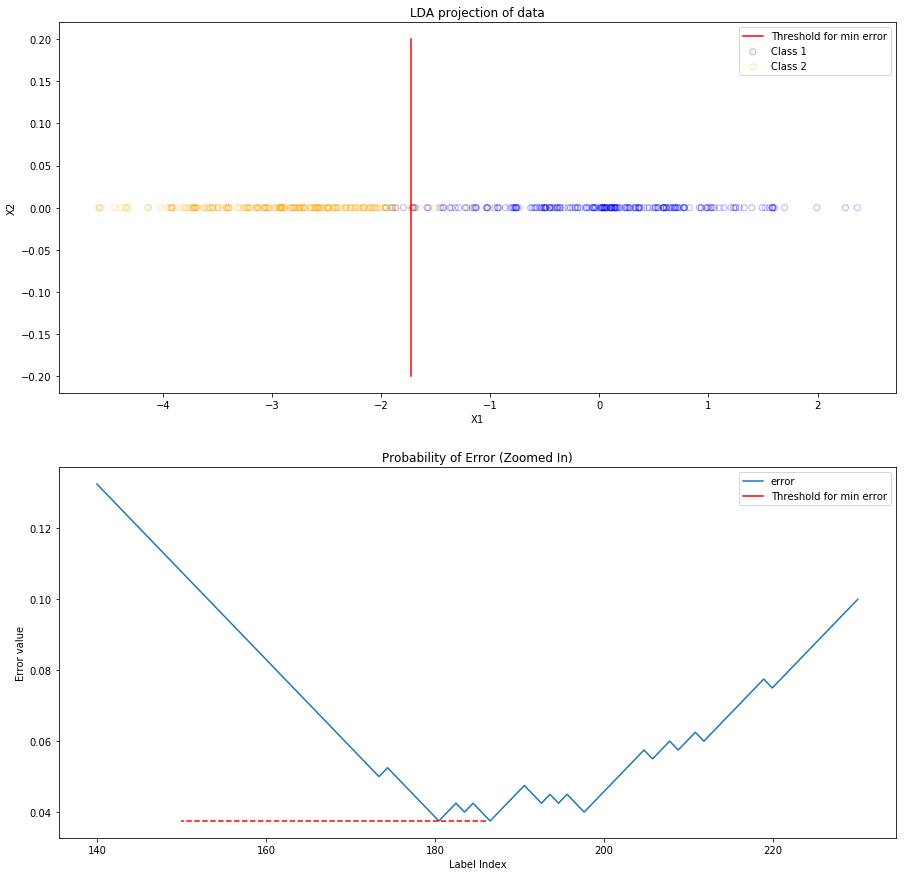

In [263]:
c2lda1 = c2vector.reshape(1,2)@c2class1 # Multiplying with the eigen vector for projecting the data
c2lda2 = c2vector.reshape(1,2)@c2class2
  
  
df1 = pd.DataFrame(c2lda1.T)
df1.columns = ['Values']
df1['Class'] = pd.Series([1]*c2_num1)
df2 = pd.DataFrame(c2lda2.T)
df2.columns = ['Values']
df2['Class'] = pd.Series([2]*c2_num1)
df3 = pd.concat([df1,df2])
df3.sort_values(by = ['Values'], axis = 0, inplace = True)
df3.reset_index(inplace = True)

error = []
erc1 = c2_num2
erc2 = 0
temp = 400
for val in df3.index:
  if(df3.iloc[val]['Class'] == 2):
    erc1 = erc1 - 1
  elif(df3.iloc[val]['Class'] == 1):
    erc2 = erc2 + 1
    
  error.append(erc1+erc2)

err_arr = np.array(error)/400
min_indices = np.where(err_arr == err_arr.min())[0]
min_idx = min_indices[len(min_indices)//2]
min_val = df3.iloc[min_idx]['Values']

c1_miss = df3[(df3['Values'] < min_val) & (df3['Class'] == 1)].shape[0] 
c2_miss = df3[(df3['Values'] > min_val) & (df3['Class'] == 2)].shape[0]

print('Number of samples of class 1 classified as class 2: {}'.format(c1_miss))
print('Number of samples of class 2 classified as class 1: {}'.format(c2_miss))
print('Error = {}'.format((c1_miss + c2_miss)/400))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
ax2.plot(np.linspace(140,230,90), err_arr[140:230])
ax2.plot([min_idx, min_idx], [err_arr[min_idx], err_arr[min_idx]], color = 'red')
ax2.plot([min_idx, 150], [err_arr[min_idx], err_arr[min_idx]], 'r--')
ax2.set_title('Probability of Error (Zoomed In)')
ax2.set(xlabel='Label Index', ylabel='Error value')
ax2.legend(('error', 'Threshold for min error'))

# fig.axes([1,1,1.5,1.5])
ax1.scatter(c2lda1,[0]*c2_num1, color = 'blue', facecolor = 'none', alpha = 0.3)
ax1.scatter(c2lda2,[0]*c2_num2, color = 'orange', facecolor = 'none', alpha = 0.3)
ax1.plot([min_val, min_val], [-0.2,0.2], color = 'red')
ax1.set_title('LDA projection of data')
ax1.set(xlabel='X1', ylabel='X2')
ax1.legend(('Threshold for min error', 'Class 1', 'Class 2'))

###Case 3

In [0]:
c3vector = gen_proj(np.mean(c3class1, axis = 1), np.mean(c3class2, axis = 1), np.cov(c3class1), np.cov(c3class2))

Number of samples of class 1 classified as class 2: 34
Number of samples of class 2 classified as class 1: 12
Error = 0.115


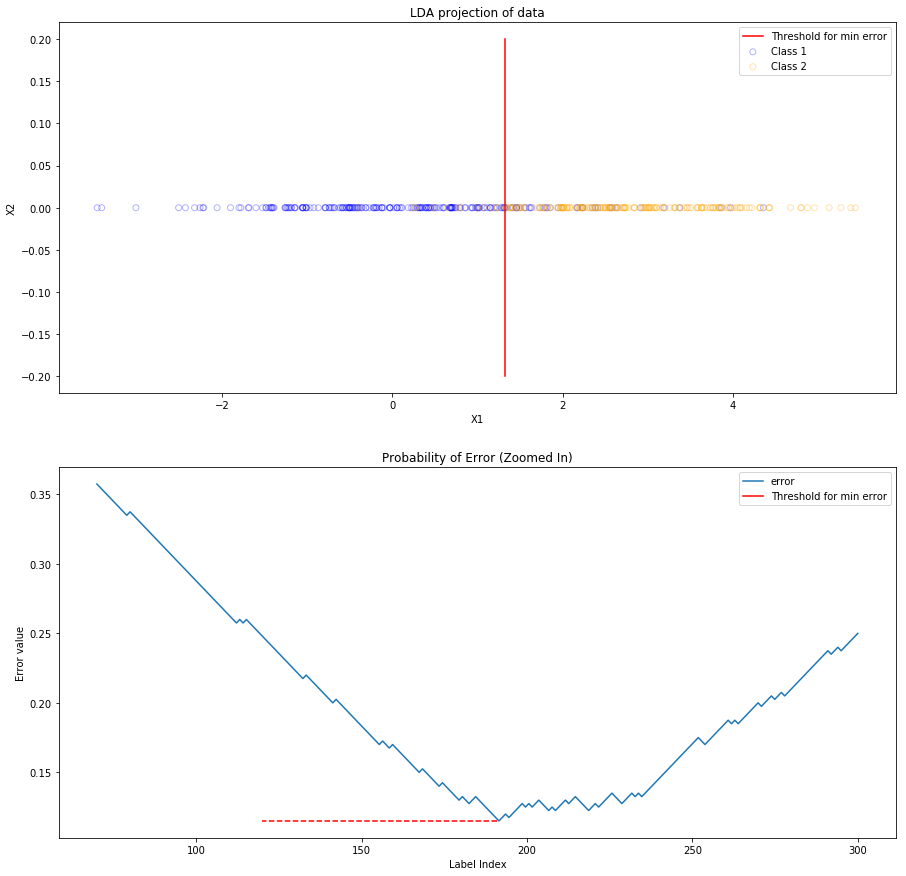

In [262]:
c3lda1 = c3vector.reshape(1,2)@c3class1 # Multiplying with the eigen vector for projecting the data
c3lda2 = c3vector.reshape(1,2)@c3class2
  
  
df1 = pd.DataFrame(c3lda1.T)
df1.columns = ['Values']
df1['Class'] = pd.Series([1]*c3_num1)
df2 = pd.DataFrame(c3lda2.T)
df2.columns = ['Values']
df2['Class'] = pd.Series([2]*c3_num2)
df3 = pd.concat([df1,df2])
df3.sort_values(by = ['Values'], axis = 0, inplace = True)
df3.reset_index(inplace = True)

error = []
erc1 = c3_num1
erc2 = 0
temp = 400
for val in df3.index:
  if(df3.iloc[val]['Class'] == 1):
    erc1 = erc1 - 1
  elif(df3.iloc[val]['Class'] == 2):
    erc2 = erc2 + 1
    
  error.append(erc1+erc2)

err_arr = np.array(error)/400
min_indices = np.where(err_arr == err_arr.min())[0]
min_idx = min_indices[len(min_indices)//2]
min_val = df3.iloc[min_idx]['Values']

c1_miss = df3[(df3['Values'] > min_val) & (df3['Class'] == 1)].shape[0] 
c2_miss = df3[(df3['Values'] < min_val) & (df3['Class'] == 2)].shape[0]

print('Number of samples of class 1 classified as class 2: {}'.format(c1_miss))
print('Number of samples of class 2 classified as class 1: {}'.format(c2_miss))
print('Error = {}'.format((c1_miss + c2_miss)/400))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
ax2.plot(np.linspace(70,300,230), err_arr[70:300])
ax2.plot([min_idx, min_idx], [err_arr[min_idx], err_arr[min_idx]], color = 'red')
ax2.plot([min_idx, 120], [err_arr[min_idx], err_arr[min_idx]], 'r--')
ax2.set_title('Probability of Error (Zoomed In)')
ax2.set(xlabel='Label Index', ylabel='Error value')
ax2.legend(('error', 'Threshold for min error'))

# fig.axes([1,1,1.5,1.5])
ax1.scatter(c3lda1,[0]*c3_num1, color = 'blue', facecolor = 'none', alpha = 0.3)
ax1.scatter(c3lda2,[0]*c3_num2, color = 'orange', facecolor = 'none', alpha = 0.3)
ax1.plot([min_val, min_val], [-0.2,0.2], color = 'red')
ax1.set_title('LDA projection of data')
ax1.set(xlabel='X1', ylabel='X2')
ax1.legend(('Threshold for min error', 'Class 1', 'Class 2'))